<a href="https://colab.research.google.com/github/E-B-Manohar/Object-Classification-with-Keras-using-Transfer-Learning/blob/master/AlexNet_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Modules to ignore warnings
import warnings               
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os   
import shutil
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import call

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.models import Sequential, Model, load_model
from keras.layers import *
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
train_path = '/content/drive/My Drive/Colab Notebooks/10_categories'   # Train data path
classes = os.listdir(train_path)                          # List of directories in train path
print(classes)

['car_side', 'watch', 'Faces_easy', 'airplanes', 'Leopards', 'Motorbikes', 'BACKGROUND_Google', 'Faces', 'bonsai', 'grand_piano']


In [0]:
for ix,i in enumerate(classes):
    print(i,"\n",len(os.listdir(os.path.join(train_path,i))))

car_side 
 712
watch 
 823
Faces_easy 
 731
airplanes 
 828
Leopards 
 775
Motorbikes 
 798
BACKGROUND_Google 
 759
Faces 
 730
bonsai 
 708
grand_piano 
 689


In [0]:
# This is the augmentation configuration we will use for training
data_generator = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                    height_shift_range=0.2,
                                    validation_split = 0.2,
                                    zoom_range=0.2)

# This is a generator that will read pictures found in subfolers of 'train', and generates
# batches of augmented image data on the fly
train_generator = data_generator.flow_from_directory(directory=train_path,
                                                   # batch_size=64, 
                                                    class_mode='categorical', 
                                                    shuffle=True,
                                                    subset = "training",
                                                    target_size=(160, 160))

val_generator = data_generator.flow_from_directory(directory=train_path,
                                                   # batch_size=64,
                                                    class_mode='categorical', 
                                                    shuffle=True,
                                                    subset = "validation",
                                                    target_size=(160, 160))

Found 6046 images belonging to 10 classes.
Found 1506 images belonging to 10 classes.


In [0]:
import torchvision.models as models


alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:14<00:00, 16945779.87it/s]


In [0]:
alexnet.parameters

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2

In [0]:
from graphviz import Digraph

def make_dot(var):
    node_attr = dict(style='filled',
                     shape='box',
                     align='left',
                     fontsize='12',
                     ranksep='0.1',
                     height='0.2')
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()
    


<bound method Module.state_dict of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2

In [0]:
model.load_weights("/content/drive/My Drive/Colab Notebooks/Pre Trained/Facenet/weights/facenet_keras_weights.h5")

In [0]:
model.count_params()

22808144

In [0]:
len(model.layers)

426

In [0]:
## from keras.utils import plot_model
## 
## plot_model(model, to_file="FaceNet.png", show_shapes=True)
## 
## from IPython.display import Image
## Image("FaceNet.png")

In [0]:
def FaceNet_tl(model, nb_classes, freez_wts):
    
    trained_model = model
    x = trained_model.output
  #  x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
  
    pred_inception= Dense(nb_classes,activation='softmax')(x)
    model = Model(inputs=trained_model.input,outputs=pred_inception)
    
    for layer in trained_model.layers:
        layer.trainable=(1-freez_wts)
    
    return(model)
  

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
__________________________________________________________________________________________________
Conv2d_2a_

In [0]:
model.

In [0]:
model = FaceNet_tl(model, nb_classes=10, freez_wts=False)
 
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adadelta')

In [0]:
# from keras.utils import plot_model
# plot_model(model, to_file='FaceNet_tl.png', show_shapes=True, show_layer_names=True)
# 
# from IPython.display import Image
# Image("FaceNet_tl.png")

In [0]:
chkp = ModelCheckpoint(filepath='FaceNet_tl.h5', monitor='val_acc', save_best_only=True, save_weights_only=False, verbose=1)

history = model.fit_generator(train_generator, 
                              steps_per_epoch = train_generator.samples/train_generator.batch_size,
                              
                              validation_data = val_generator, 
                              validation_steps = val_generator.samples/val_generator.batch_size,
                              callbacks= [chkp],
                              epochs=100, verbose= 1 ,shuffle = True).history

Epoch 1/50
189/188 [==============================] - 4132s 22s/step - loss: 0.4293 - acc: 0.8702 - val_loss: 0.2528 - val_acc: 0.9104

Epoch 00001: val_acc improved from -inf to 0.91036, saving model to FaceNet_tl.h5
Epoch 2/50
189/188 [==============================] - 67s 353ms/step - loss: 0.1433 - acc: 0.9590 - val_loss: 0.1976 - val_acc: 0.9402

Epoch 00002: val_acc improved from 0.91036 to 0.94024, saving model to FaceNet_tl.h5
Epoch 3/50
189/188 [==============================] - 71s 374ms/step - loss: 0.0978 - acc: 0.9709 - val_loss: 0.1301 - val_acc: 0.9588

Epoch 00003: val_acc improved from 0.94024 to 0.95883, saving model to FaceNet_tl.h5
Epoch 4/50
189/188 [==============================] - 72s 380ms/step - loss: 0.0827 - acc: 0.9759 - val_loss: 0.1554 - val_acc: 0.9588

Epoch 00004: val_acc did not improve from 0.95883
Epoch 5/50
189/188 [==============================] - 72s 381ms/step - loss: 0.0619 - acc: 0.9823 - val_loss: 0.1385 - val_acc: 0.9608

Epoch 00005: val_a

In [0]:
max(history['val_acc'])

0.9873837981407703

Text(0.5, 1.0, 'Accuracy')

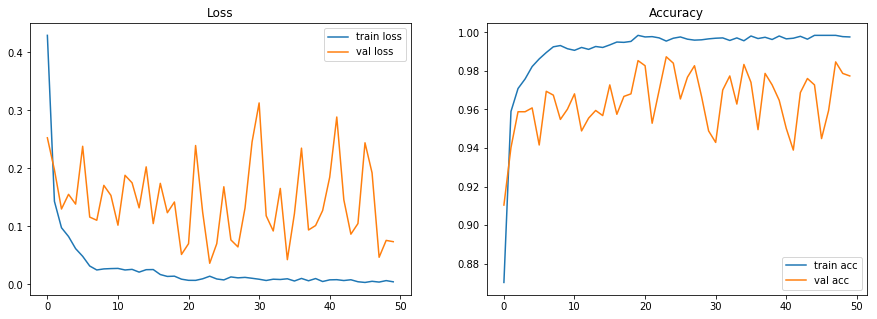

In [0]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
train_loss = plt.plot(history['loss'], label='train loss')
val_loss = plt.plot(history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
train_loss = plt.plot(history['acc'], label='train acc')
val_loss = plt.plot(history['val_acc'], label='val acc')
plt.legend()
plt.title('Accuracy')

In [0]:
chkp.params

{'do_validation': True,
 'epochs': 50,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'steps': 188.9375,
 'verbose': 1}

In [0]:
chkp.params.values()

dict_values([50, 188.9375, 1, True, ['loss', 'acc', 'val_loss', 'val_acc']])

In [0]:
chkp.filepath.

SyntaxError: ignored